In [3]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this session, we conducted a Kmeans-clustering(cluster=10) according to the duration and mileage of each flight and ploted the clustering results. According to the result, we are able to draw a conclusion that most of Hancong's filghts are either short flights(within 5 hours/4000 mileage) or long flights(over 10 hours/8000 mileage). He barely takes flights that is between 5-10 hours/4000-8000 mileage.

In [4]:
df=pd.read_excel("flights.xlsx")

In [5]:
#Convert duration values in "HOUR:MINUTE" format to hours
time = pd.DatetimeIndex(df['Duration'].astype(str))
df['Duration'] = time.hour + time.minute/60

In [6]:
# Check the new duration values
df["Duration"].head()

0    1.416667
1    2.250000
2    2.583333
3    2.083333
4    1.916667
Name: Duration, dtype: float64

In [7]:
#Kmeans Clustering
DishCluster = np.array(df[['Duration','Mileage']])
clf=KMeans(n_clusters=10)
# 10 clusters
clf=clf.fit(DishCluster)
clf.cluster_centers_
# Check the "center" of each cluster

array([[1.27976190e+01, 1.03345000e+04],
       [2.31153846e+00, 1.26982051e+03],
       [5.26333333e+00, 3.57760000e+03],
       [1.23214286e+00, 3.88642857e+02],
       [9.00000000e+00, 6.44500000e+03],
       [1.11777778e+01, 9.08833333e+03],
       [1.39772727e+01, 1.14093636e+04],
       [3.05769231e+00, 1.78026923e+03],
       [1.84574468e+00, 8.55765957e+02],
       [4.18947368e+00, 2.79189474e+03]])

In [8]:
# Add clustering labels to each row
df['label']=clf.labels_
df.head()

,Date,Flight No,Actual,Airline,Domestic/Int,Alliance,Country/Region,Departure City,Departure Airport,Depart Code,...,Tax,Manufacturer,Aircraft,Aircraft Code,Reg No,Meal,Bag,Seq,FFP,label
0,2008.6.28,MU5664,MU5664,China Eastern Airlines,D,ST,China,Xiamen,Xiamen Gaoqi Int'l,XMN,...,NaN,Boeing,MD-90-30,MD90,NaN,1,NaN,NaN,NaN,8
1,2009.8.21,9C8839,9C8839,Spring Airlines,D,NaN,China,Shanghai,Shanghai Pudong Int'l,PVG,...,NaN,Airbus,A320-214,A320,NaN,0,NaN,NaN,NaN,1
2,2009.8.28,9C8810,9C8810,Spring Airlines,D,NaN,China,Changchun,Changchun Longjia Int'l,CGQ,...,NaN,Airbus,A320-214,A320,NaN,0,NaN,NaN,NaN,7
3,2010.2.2,MU515,MU515,China Eastern Airlines,I,ST,China,Shanghai,Shanghai Pudong Int'l,PVG,...,NaN,Airbus,A300B4-605R,A306,NaN,1,NaN,NaN,NaN,1
4,2010.2.6,MU518,MU518,China Eastern Airlines,I,ST,China,Fukuoka,Fukuoka Int'l,FUK,...,NaN,Boeing,737-89PWL,B738,B-5472,1,NaN,NaN,NaN,8


In [9]:
#Find the range of X and Y
#plt.xlabel('Duration')
#plt.ylabel('Mileage')
a=df["Duration"].min()
b=df["Duration"].max()
c=df["Mileage"].min()
d=df["Mileage"].max()
a,b,c,d

(0.8333333333333334, 15.083333333333334, 150, 11977)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:31: MatplotlibDeprecationWarning: The colors function was deprecated in version 2.1.


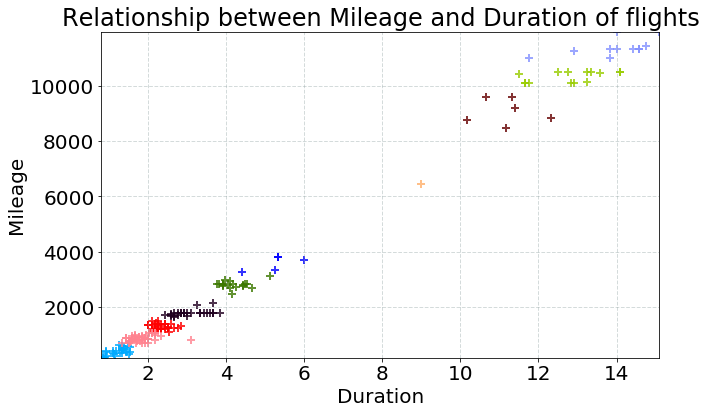

In [18]:
# Visualize the distribution
g1=df.loc[df["label"] == 0]
g2=df.loc[df["label"] == 1]
g3=df.loc[df["label"] == 2]
g4=df.loc[df["label"] == 3]
g5=df.loc[df["label"] == 4]
g6=df.loc[df["label"] == 5]
g7=df.loc[df["label"] == 6]
g8=df.loc[df["label"] == 7]
g9=df.loc[df["label"] == 8]
g10=df.loc[df["label"] == 9]
#scatter plot of the clusterig outcome
plt.figure(figsize=(10,6))
plt.rc('font', family='STXihei', size=20)
plt.scatter(g1['Duration'],g1['Mileage'],50,color='#99CC01',marker='+',linewidth=2,alpha=0.8)
plt.scatter(g2['Duration'],g2['Mileage'],50,color='#FE0000',marker='+',linewidth=2,alpha=0.8)
plt.scatter(g3['Duration'],g3['Mileage'],50,color='#0000FF',marker='+',linewidth=2,alpha=0.8)
plt.scatter(g4['Duration'],g4['Mileage'],50,color='#00aaff',marker='+',linewidth=2,alpha=0.8)
plt.scatter(g5['Duration'],g5['Mileage'],50,color='#ffbd83',marker='+',linewidth=2,alpha=0.8)
plt.scatter(g6['Duration'],g6['Mileage'],50,color='#660000',marker='+',linewidth=2,alpha=0.8)
plt.scatter(g7['Duration'],g7['Mileage'],50,color='#8391ff',marker='+',linewidth=2,alpha=0.8)
plt.scatter(g8['Duration'],g8['Mileage'],50,color='#200020',marker='+',linewidth=2,alpha=0.8)
plt.scatter(g9['Duration'],g9['Mileage'],50,color='#ff8390',marker='+',linewidth=2,alpha=0.8)
plt.scatter(g10['Duration'],g10['Mileage'],50,color='#3c7800',marker='+',linewidth=2,alpha=0.8)
plt.xlabel('Duration')
plt.ylabel('Mileage')
plt.ylim(150,11977)
plt.xlim(0.8,15.1)
plt.title("Relationship between Mileage and Duration of flights")
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
plt.colors()
plt.show()